# Homework 04 - Evaluation


In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

## Dataset Import


In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).


In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not. 

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,NaN,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NaN,5,71016.0,self_employed,north_america,0,0.25,1


In [40]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

## Data preparation and data split

* Check if the missing values are presented in the features.
* If there are missing values:
    * For caterogiral features, replace them with 'NA'
    * For numerical features, replace with with 0.0 


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`


In [41]:
# Sum of null values in each column
def list_null_values(df):
    return df.isnull().sum()

In [42]:
# Function to fill missing values with a value
def fill_null_values(df, cat_fill_value, num_fill_value):
    cat_columns = df.select_dtypes(include=['object']).columns
    num_columns = df.select_dtypes(include=['int64','float64']).columns
    
    # Fill NaNs for categorical columns with the provided value
    df[cat_columns] = df[cat_columns].fillna(cat_fill_value)
    
    # Fill NaNs for numerical columns with the provided value
    df[num_columns] = df[num_columns].fillna(num_fill_value)
    
    return df

In [43]:
list_null_values(df)

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [44]:
df =fill_null_values(df=df, cat_fill_value='NA', num_fill_value=0.0)
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,0.0,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NA,5,71016.0,self_employed,north_america,0,0.25,1


In [45]:
list_null_values(df)

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [46]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [47]:
len(df_train),len(df_test), len(df_val)

(876, 293, 293)

In [48]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [49]:
y_full_train = df_full_train.converted.values
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [50]:
del df_full_train['converted']
del df_train['converted']
del df_val['converted']
del df_test['converted'] 

In [51]:
categorical = list(df_full_train.select_dtypes(include=['object']).columns)
numerical =list(df_full_train.select_dtypes(include=['int64','float64']).columns)

In [52]:
numerical = ['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']
numerical

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']

## Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['balance']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `lead_score`
- `number_of_courses_viewed`
- `interaction_count`
- `annual_income`



In [57]:
for i in numerical:
    auc = roc_auc_score(y_train, df_train[i])
    print (f"{i}: auc: {auc}")

number_of_courses_viewed: auc: 0.761438552686335
annual_income: auc: 0.538337494798169
interaction_count: auc: 0.7197718860196685
lead_score: auc: 0.6264729395273452


In [61]:
for i in numerical:
    auc = roc_auc_score(y_train, df_train[i])
    if auc <0.5:
        auc = roc_auc_score(y_train, -df_train[i])
    print (f"AOC value for {i}: {auc}")

AOC value for number_of_courses_viewed: 0.761438552686335
AOC value for annual_income: 0.538337494798169
AOC value for interaction_count: 0.7197718860196685
AOC value for lead_score: 0.6264729395273452


## Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.32
- 0.52
- 0.72
- 0.92

In [63]:
# One-hot encoding
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [64]:
# Initialization of logistic regression model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

# Train model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [69]:
# Predict on the test data 
y_pred = model.predict(X_test)

# Evaluate accuracy 
accuracy_test = accuracy_score(y_test, y_pred)
# auc
auc_test = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {round(accuracy_test,2)}")
print(f"AUC: {round(auc_test,3)}")

Accuracy: 0.76
AUC: 0.698


In [70]:
# Predict on the validation data 
y_pred = model.predict(X_val)

# Evaluate accuracy
accuracy_val = accuracy_score(y_val, y_pred)

# auc
auc_val = roc_auc_score(y_val, y_pred)

print(f"Accuracy: {round(accuracy_val,2)}")
print(f"AUC: {round(auc_val,3)}")

Accuracy: 0.73
AUC: 0.673


## Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.145
* 0.345
* 0.545
* 0.745




In [71]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.618
0.05 0.730
0.10 0.730
0.15 0.730
0.20 0.730
0.25 0.730
0.30 0.730
0.35 0.730
0.40 0.730
0.45 0.730
0.50 0.730
0.55 0.730
0.60 0.730
0.65 0.730
0.70 0.730
0.75 0.730
0.80 0.730
0.85 0.730
0.90 0.730
0.95 0.730
1.00 0.730


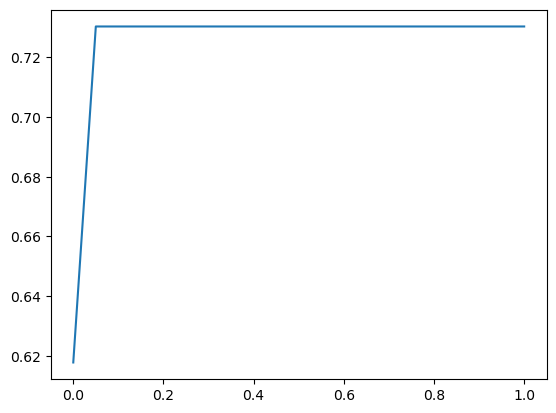

In [72]:

plt.plot(thresholds, scores)

In [73]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [74]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[ 48,  64],
       [ 15, 166]])

### Precision and Recall

In [75]:
p = tp / (tp + fp)
p


0.7217391304347827

In [76]:
r = tp / (tp + fn)
r

0.9171270718232044

### ROC Curves
#### TPR and FRP

In [77]:
tpr = tp / (tp + fn)
tpr

0.9171270718232044

In [78]:
fpr = fp / (fp + tn)
fpr

0.5714285714285714

In [79]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [80]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

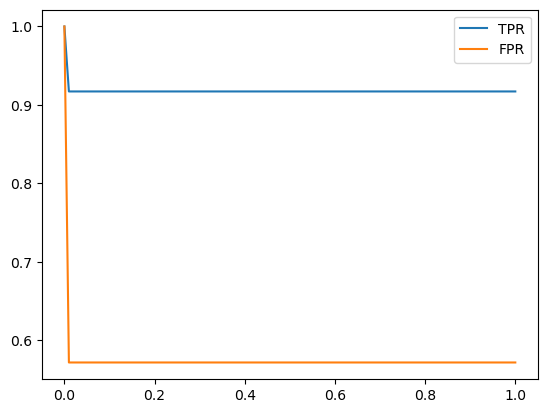

In [81]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

## Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.14
- 0.34
- 0.54
- 0.74




## Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.36




## Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw04
* If your answer doesn't match options exactly, select the closest one